# Natural Language Processing Exercise (10 points)



# 1. Load the Dataset

In this exercise we will use the Reuters newswire dataset, which consists of 11,228 newswires from Reuters, labeled in 46 topics. Each newswire is a text sequence that is encoded as a list of word indexes, i.e., each word is a token represented by an integer. Reuters newswire dataset is available in the Keras built-in datasets. 


In [46]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Print the version of tf
print("TensorFlow version:{}".format(tf.__version__))
print("Keras version:{}".format(keras.__version__))

TensorFlow version:2.5.0
Keras version:2.5.0


We can load the `word_index` for the Reuters dataset, which is a dictionary consisting of words as keys and the corresponding integer indices as values. As we can see below, there are 30,979 words in the vocabulary for this dataset. 

In [47]:
word_index = keras.datasets.reuters.get_word_index()

In [48]:
len(word_index)

30979

In [49]:
# let's print 10 words and indices from the vocabulary
list(word_index.items())[:10]

[('mdbl', 10996),
 ('fawc', 16260),
 ('degussa', 12089),
 ('woods', 8803),
 ('hanging', 13796),
 ('localized', 20672),
 ('sation', 20673),
 ('chanthaburi', 20675),
 ('refunding', 10997),
 ('hermann', 8804)]

Let's load the dataset by using the first 30,000 words.

In [ ]:
max_features = 30000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.reuters.load_data(num_words=max_features, test_split=0.2)

Print the length of train_data, train_labels, test_data, and test_labels.

In [51]:
# Your Code Here
print(len(train_data), len(train_labels), len(test_data), len(test_labels))

8982 8982 2246 2246


Note again that each sequence in the dataset is a list of integer tokens representing words. 
Print the first and second sequences in the train dataset.

In [52]:
# Your Code Here
train_data[0]

[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [53]:
# Your Code Here
train_data[1]

[1,
 3267,
 699,
 3434,
 2295,
 56,
 16784,
 7511,
 9,
 56,
 3906,
 1073,
 81,
 5,
 1198,
 57,
 366,
 737,
 132,
 20,
 4093,
 7,
 19261,
 49,
 2295,
 13415,
 1037,
 3267,
 699,
 3434,
 8,
 7,
 10,
 241,
 16,
 855,
 129,
 231,
 783,
 5,
 4,
 587,
 2295,
 13415,
 2,
 775,
 7,
 48,
 34,
 191,
 44,
 35,
 1795,
 505,
 17,
 12]

Based on the word_index, we can find the sentences that correspond to each sequence of integers, as in the next cell.

In [54]:
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

print([reverse_word_index.get(i-3) for i in train_data[0]])

[None, 'mcgrath', 'rentcorp', 'said', 'as', 'a', 'result', 'of', 'its', 'december', 'acquisition', 'of', 'space', 'co', 'it', 'expects', 'earnings', 'per', 'share', 'in', '1987', 'of', '1', '15', 'to', '1', '30', 'dlrs', 'per', 'share', 'up', 'from', '70', 'cts', 'in', '1986', 'the', 'company', 'said', 'pretax', 'net', 'should', 'rise', 'to', 'nine', 'to', '10', 'mln', 'dlrs', 'from', 'six', 'mln', 'dlrs', 'in', '1986', 'and', 'rental', 'operation', 'revenues', 'to', '19', 'to', '22', 'mln', 'dlrs', 'from', '12', '5', 'mln', 'dlrs', 'it', 'said', 'cash', 'flow', 'per', 'share', 'this', 'year', 'should', 'be', '2', '50', 'to', 'three', 'dlrs', 'reuter', '3']


The labels are the categories of the newswires. All 46 categories are shown below.

```
Reuters dataset labels:
{'copper': 6, 'livestock': 28, 'gold': 25, 'money-fx': 19, 'ipi': 30, 'trade': 11, 'cocoa': 0, 'iron-steel': 31, 
'reserves': 12, 'tin': 26, 'zinc': 37, 'jobs': 34, 'ship': 13, 'cotton': 14, 'alum': 23, 'strategic-metal': 27, 
'lead': 45, 'housing': 7, 'meal-feed': 22, 'gnp': 21, 'sugar': 10, 'rubber': 32, 'dlr': 40, 'veg-oil': 2, 'interest': 20,
 'crude': 16, 'coffee': 9, 'wheat': 5, 'carcass': 15, 'lei': 35, 'gas': 41, 'nat-gas': 17, 'oilseed': 24, 'orange': 38,
  'heat': 33, 'wpi': 43, 'silver': 42, 'cpi': 18, 'earn': 3, 'bop': 36, 'money-supply': 8, 'hog': 44, 'acq': 4,
   'pet-chem': 39, 'grain': 1, 'retail': 29}
```

Printed below is the category for the first sentence, which corresponds to `earn`.

In [55]:
train_labels[0]

3

Use Matplotlib to plot the histogram of the categories of newswires in train_labels.

<BarContainer object of 46 artists>

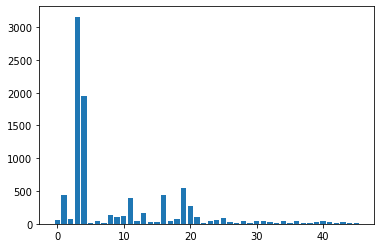

In [56]:
# Your Code Here
from matplotlib import pyplot as plt
newswires = {'copper': 6, 'livestock': 28, 'gold': 25, 'money-fx': 19, 'ipi': 30, 'trade': 11, 'cocoa': 0, 'iron-steel': 31, 
'reserves': 12, 'tin': 26, 'zinc': 37, 'jobs': 34, 'ship': 13, 'cotton': 14, 'alum': 23, 'strategic-metal': 27, 
'lead': 45, 'housing': 7, 'meal-feed': 22, 'gnp': 21, 'sugar': 10, 'rubber': 32, 'dlr': 40, 'veg-oil': 2, 'interest': 20,
 'crude': 16, 'coffee': 9, 'wheat': 5, 'carcass': 15, 'lei': 35, 'gas': 41, 'nat-gas': 17, 'oilseed': 24, 'orange': 38,
  'heat': 33, 'wpi': 43, 'silver': 42, 'cpi': 18, 'earn': 3, 'bop': 36, 'money-supply': 8, 'hog': 44, 'acq': 4,
   'pet-chem': 39, 'grain': 1, 'retail': 29}
newswires = {v:k for k,v in newswires.items()}
labels, nums = [], []
for k,v in newswires.items():
    labels.append(k)
    nums.append(0)
for i in train_labels:
    if i in labels:
        nums[labels.index(i)] += 1
plt.bar(labels, nums)

## 2. Pad the Sequences

Create a new NumPy array called `len_sequences` which has the same length as the train_data array. Write a for-loop and assign the length of each sequence (number of tokens in each sequence) to the elements in `len_sequences`.

Afterward, use the `len_sequences` array to print the average length of train sequences, the length of the longest train sequence, and the length of the shortest train sequence. 

In [57]:
# Your Code Here
l = [len(x) for x in train_data]
n = np.asarray(l)
print(np.mean(n), max(n), min(n))

145.5398574927633 2376 13


Create a new integer variable `pad_length` which is approximately equal to 2 x the average length of train sequences. E.g., if the average is 48.1, set maxlen to 100, or something in that range.

Apply padding to the train and test sequences, so that they have length equal to `pad_length`. 

In [58]:
# Your Code Here
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_data = pad_sequences(train_data, maxlen=300)
test_data = pad_sequences(test_data, maxlen=300)

Display the first 2 padded sequences in the train dataset. 

In [59]:
# Your Code Here
print(train_data[0])
print(train_data[1])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

## 3. Create and Train a Model with Dense Layers

Define a Keras model `model_1` similar to the model in Lecture 18, which has an Embedding, Flatten, Dense, Dropout, and a final Dense layer. Use 64-dimensional vectors as outputs of the Embedding Layer, and 1,024 neurons in the first Dense layer. Make sure that the last layer outputs 46 categories, and recall that with multiclass datasets the activation of the last layer should be `softmax`.


In [60]:
# Your Code Here
model_1 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim=max_features, output_dim=64, input_length=300),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(46, activation='softmax')
])

Display the summary of the model, and report the number of trainable parameters.

In [61]:
# Your Code Here
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 64)           1920000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 19200)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              19661824  
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 46)                47150     
Total params: 21,628,974
Trainable params: 21,628,974
Non-trainable params: 0
_________________________________________________________________


Compile the model with Adam optimizer using the default settings. If needed, review Lecture 16 to ensure that you apply the correct loss function. 

Afterward, train the model for 5 epochs, and ensure that there are no errors in fitting the model. Use a batch size of 128, and split the training data so that 20% is used for validation.

Evaluate the model on the test dataset. The expected accuracy should be between 65% and 70%.

In [62]:
# Your Code Here
model_1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model_1.fit(train_data, train_labels, validation_data = (train_data, train_labels), validation_split=0.2, epochs=5, batch_size=128)
test_loss, test_acc = model_1.evaluate(test_data,  test_labels, verbose=2)
test_acc

Epoch 1/5
57/57 [==============================] - 2s 21ms/step - loss: 2.1395 - accuracy: 0.4571 - val_loss: 1.6658 - val_accuracy: 0.5671
Epoch 2/5
57/57 [==============================] - 1s 19ms/step - loss: 1.2581 - accuracy: 0.7051 - val_loss: 1.3839 - val_accuracy: 0.6750
Epoch 3/5
57/57 [==============================] - 1s 17ms/step - loss: 0.6600 - accuracy: 0.8548 - val_loss: 1.3054 - val_accuracy: 0.6984
Epoch 4/5
57/57 [==============================] - 1s 18ms/step - loss: 0.3342 - accuracy: 0.9357 - val_loss: 1.3542 - val_accuracy: 0.6973
Epoch 5/5
57/57 [==============================] - 1s 18ms/step - loss: 0.2023 - accuracy: 0.9585 - val_loss: 1.3826 - val_accuracy: 0.7045
71/71 - 0s - loss: 1.3544 - accuracy: 0.6937


0.6936776638031006

### Apply Early Stopping

Create a model named `model_2` that is similar to `model_1`, but it uses Early Stopping callback. See Lectures 16 and 21 for examples with Early Stopping callback. 

Train the model, plot the learning curves, and report the accuracy on the test dataset. 

The training time should be just a few minutes.

Epoch 1/20
57/57 [==============================] - 2s 21ms/step - loss: 2.1197 - accuracy: 0.4605 - val_loss: 1.6817 - val_accuracy: 0.5665
Epoch 2/20
57/57 [==============================] - 1s 17ms/step - loss: 1.2291 - accuracy: 0.7091 - val_loss: 1.3715 - val_accuracy: 0.6767
Epoch 3/20
57/57 [==============================] - 1s 17ms/step - loss: 0.6313 - accuracy: 0.8639 - val_loss: 1.3249 - val_accuracy: 0.7012
Epoch 4/20
57/57 [==============================] - 1s 17ms/step - loss: 0.3060 - accuracy: 0.9418 - val_loss: 1.3426 - val_accuracy: 0.7045
Epoch 5/20
57/57 [==============================] - 1s 17ms/step - loss: 0.1923 - accuracy: 0.9609 - val_loss: 1.3366 - val_accuracy: 0.7112
Epoch 6/20
57/57 [==============================] - 1s 17ms/step - loss: 0.1667 - accuracy: 0.9614 - val_loss: 1.4203 - val_accuracy: 0.6912
Epoch 7/20
57/57 [==============================] - 1s 17ms/step - loss: 0.1486 - accuracy: 0.9638 - val_loss: 1.3493 - val_accuracy: 0.7123
Epoch 8/20
57

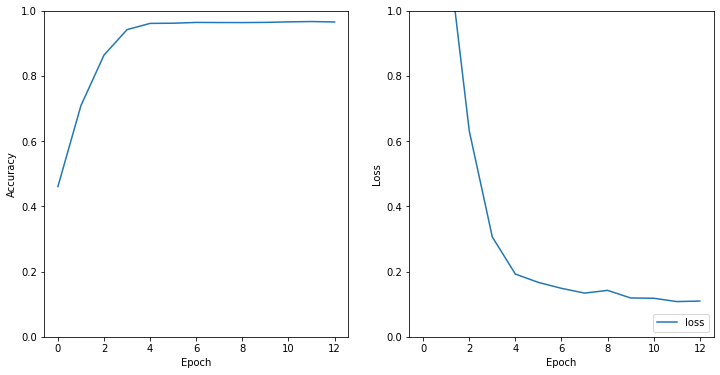

71/71 - 0s - loss: 1.3688 - accuracy: 0.6977


0.6976847648620605

In [66]:
# Your Code Here
model_2 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim=max_features, output_dim=64, input_length=300),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(46, activation='softmax')
])
earlystop_callback = keras.callbacks.EarlyStopping(
  monitor='val_accuracy', 
  patience=5)
model_2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model_2.fit(train_data, train_labels, callbacks=[earlystop_callback], validation_data = (train_data, train_labels), validation_split=0.2, epochs=20, batch_size=128)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model_2.evaluate(test_data,  test_labels, verbose=2)
test_acc

### Global Average Pooling Layer

Create `model_3` that replaces the `Flatten` layer with `GlobalAveragePooling1D()` layer. Fit the model, plot the learning curves, and report the accuracy on the test dataset. 

Epoch 1/20
57/57 [==============================] - 1s 21ms/step - loss: 2.8636 - accuracy: 0.3471 - val_loss: 2.3036 - val_accuracy: 0.3450
Epoch 2/20
57/57 [==============================] - 1s 14ms/step - loss: 2.2595 - accuracy: 0.3550 - val_loss: 2.1835 - val_accuracy: 0.3500
Epoch 3/20
57/57 [==============================] - 1s 16ms/step - loss: 2.0842 - accuracy: 0.3808 - val_loss: 1.9579 - val_accuracy: 0.4001
Epoch 4/20
57/57 [==============================] - 1s 14ms/step - loss: 1.8600 - accuracy: 0.4791 - val_loss: 1.7669 - val_accuracy: 0.4992
Epoch 5/20
57/57 [==============================] - 1s 15ms/step - loss: 1.6900 - accuracy: 0.5591 - val_loss: 1.6389 - val_accuracy: 0.5799
Epoch 6/20
57/57 [==============================] - 1s 14ms/step - loss: 1.5512 - accuracy: 0.6102 - val_loss: 1.5421 - val_accuracy: 0.6160
Epoch 7/20
57/57 [==============================] - 1s 15ms/step - loss: 1.4313 - accuracy: 0.6466 - val_loss: 1.4691 - val_accuracy: 0.6455
Epoch 8/20
57

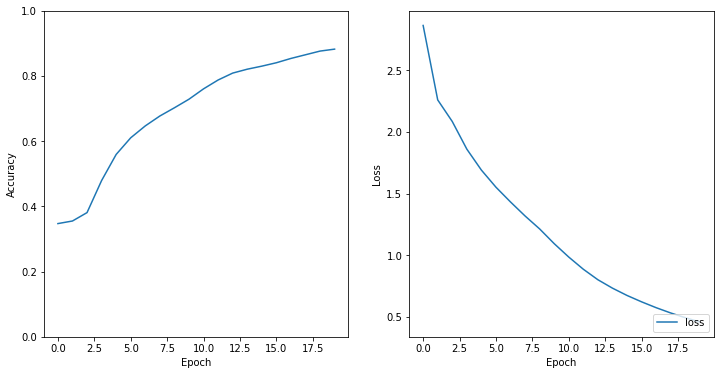

71/71 - 0s - loss: 1.2572 - accuracy: 0.7422


0.7422083616256714

In [68]:
# Your Code Here
model_3 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim=max_features, output_dim=64, input_length=300),
       tf.keras.layers.GlobalAveragePooling1D(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(46, activation='softmax')
])

earlystop_callback = keras.callbacks.EarlyStopping(
  monitor='val_accuracy', 
  patience=5)
model_3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model_3.fit(train_data, train_labels, callbacks=[earlystop_callback], validation_data = (train_data, train_labels), validation_split=0.2, epochs=20, batch_size=128)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model_3.evaluate(test_data,  test_labels, verbose=2)
test_acc

### Different Learning Rates

Train `model_4`, `model_5`, and `model_6` using Adam optimizer with learning rates of 0.01, 0.001, and 0.0001, and discuss the impact on the performance. 

In [76]:
# Your Code Here
model_4 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim=max_features, output_dim=64, input_length=300),
       tf.keras.layers.GlobalAveragePooling1D(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(46, activation='softmax')
])
model_4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model_4.fit(train_data, train_labels, validation_data = (train_data, train_labels), validation_split=0.2, epochs=10, batch_size=128)

model_5 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim=max_features, output_dim=64, input_length=300),
       tf.keras.layers.GlobalAveragePooling1D(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(46, activation='softmax')
])
model_5.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model_5.fit(train_data, train_labels, validation_data = (train_data, train_labels), validation_split=0.2, epochs=10, batch_size=128)


model_6 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim=max_features, output_dim=64, input_length=300),
       tf.keras.layers.GlobalAveragePooling1D(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(46, activation='softmax')
])
model_6.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model_6.fit(train_data, train_labels, validation_data = (train_data, train_labels), validation_split=0.2, epochs=10, batch_size=128)


Epoch 1/10
57/57 [==============================] - 1s 21ms/step - loss: 2.1298 - accuracy: 0.4420 - val_loss: 1.6052 - val_accuracy: 0.6027
Epoch 2/10
57/57 [==============================] - 1s 16ms/step - loss: 1.3746 - accuracy: 0.6611 - val_loss: 1.2227 - val_accuracy: 0.6973
Epoch 3/10
57/57 [==============================] - 1s 17ms/step - loss: 0.9287 - accuracy: 0.7614 - val_loss: 1.1391 - val_accuracy: 0.7435
Epoch 4/10
57/57 [==============================] - 1s 15ms/step - loss: 0.6489 - accuracy: 0.8315 - val_loss: 1.1585 - val_accuracy: 0.7485
Epoch 5/10
57/57 [==============================] - 1s 16ms/step - loss: 0.4722 - accuracy: 0.8767 - val_loss: 1.1502 - val_accuracy: 0.7707
Epoch 6/10
57/57 [==============================] - 1s 15ms/step - loss: 0.3673 - accuracy: 0.9058 - val_loss: 1.2976 - val_accuracy: 0.7507
Epoch 7/10
57/57 [==============================] - 1s 15ms/step - loss: 0.2805 - accuracy: 0.9285 - val_loss: 1.3054 - val_accuracy: 0.7585
Epoch 8/10
57

### Reduce Learning Rate on Plateau

Apply ReduceLROnPlatau callback and report the performance. If needed, check Lecture 21.

In [77]:
# Your Code Here
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
callbacks = [ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-6, verbose=1)]
model_7 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim=max_features, output_dim=64, input_length=300),
       tf.keras.layers.GlobalAveragePooling1D(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(46, activation='softmax')
])
model_7.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model_7.fit(train_data, train_labels, callbacks=callbacks, validation_data = (train_data, train_labels), validation_split=0.2, epochs=10, batch_size=128)


Epoch 1/10
57/57 [==============================] - 1s 18ms/step - loss: 2.1353 - accuracy: 0.4412 - val_loss: 1.6700 - val_accuracy: 0.6027
Epoch 2/10
57/57 [==============================] - 1s 15ms/step - loss: 1.4114 - accuracy: 0.6509 - val_loss: 1.2581 - val_accuracy: 0.7012
Epoch 3/10
57/57 [==============================] - 1s 15ms/step - loss: 0.9601 - accuracy: 0.7609 - val_loss: 1.1838 - val_accuracy: 0.7201
Epoch 4/10
57/57 [==============================] - 1s 15ms/step - loss: 0.6772 - accuracy: 0.8252 - val_loss: 1.1570 - val_accuracy: 0.7446
Epoch 5/10
57/57 [==============================] - 1s 15ms/step - loss: 0.5023 - accuracy: 0.8662 - val_loss: 1.1729 - val_accuracy: 0.7657
Epoch 6/10
57/57 [==============================] - 1s 15ms/step - loss: 0.3806 - accuracy: 0.8990 - val_loss: 1.2475 - val_accuracy: 0.7685
Epoch 7/10
57/57 [==============================] - 1s 15ms/step - loss: 0.2845 - accuracy: 0.9269 - val_loss: 1.2618 - val_accuracy: 0.7546
Epoch 8/10
57

### Learning Rate Scheduler

Apply a Step Decay Learning Rate Scheduler, to reduce the learning rate by half every 5 epochs. 

In [82]:
# Your Code Here
def lr_time_based_decay(epoch, lr):
    if epoch % 5 == 0:
        return lr / 2
    else:
        return lr
callbacks = [LearningRateScheduler(lr_time_based_decay, verbose=0)]
model_8 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim=max_features, output_dim=64, input_length=300),
       tf.keras.layers.GlobalAveragePooling1D(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(46, activation='softmax')
])
model_8.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model_8.fit(train_data, train_labels, callbacks=callbacks, validation_data = (train_data, train_labels), validation_split=0.2, epochs=20, batch_size=128)


Epoch 1/20
57/57 [==============================] - 1s 18ms/step - loss: 2.4042 - accuracy: 0.3517 - val_loss: 1.9155 - val_accuracy: 0.3817
Epoch 2/20
57/57 [==============================] - 1s 15ms/step - loss: 1.7262 - accuracy: 0.5410 - val_loss: 1.5528 - val_accuracy: 0.6132
Epoch 3/20
57/57 [==============================] - 1s 16ms/step - loss: 1.3154 - accuracy: 0.6786 - val_loss: 1.2680 - val_accuracy: 0.7051
Epoch 4/20
57/57 [==============================] - 1s 15ms/step - loss: 0.9479 - accuracy: 0.7653 - val_loss: 1.1481 - val_accuracy: 0.7362
Epoch 5/20
57/57 [==============================] - 1s 15ms/step - loss: 0.6977 - accuracy: 0.8248 - val_loss: 1.1150 - val_accuracy: 0.7613
Epoch 6/20
57/57 [==============================] - 1s 15ms/step - loss: 0.5247 - accuracy: 0.8617 - val_loss: 1.1165 - val_accuracy: 0.7668
Epoch 7/20
57/57 [==============================] - 1s 14ms/step - loss: 0.4470 - accuracy: 0.8831 - val_loss: 1.1522 - val_accuracy: 0.7679
Epoch 8/20
57


Feel free to perform additional hyperparameter tuning if you wish, but it is not required. 

## 4. Create and Train a Model with Recurrent Layers

Next, create `model_9` using LSTM layers similar to the model in Lecture 18. Train the model for 5 epochs and report the performance. Expect longer training time with RNN models. 

In [86]:
# Your Code Here()
model_9 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim=max_features, output_dim=64, input_length=300),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(46, activation='softmax')
])
model_9.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_9.fit(train_data, train_labels, validation_data = (train_data, train_labels), validation_split=0.2, epochs=5, batch_size=128)


Epoch 1/5
57/57 [==============================] - 5s 54ms/step - loss: 2.5535 - accuracy: 0.3840 - val_loss: 2.0204 - val_accuracy: 0.4908
Epoch 2/5
57/57 [==============================] - 3s 49ms/step - loss: 1.8279 - accuracy: 0.5333 - val_loss: 1.7343 - val_accuracy: 0.5543
Epoch 3/5
57/57 [==============================] - 3s 49ms/step - loss: 1.5625 - accuracy: 0.5893 - val_loss: 1.5965 - val_accuracy: 0.5943
Epoch 4/5
57/57 [==============================] - 3s 50ms/step - loss: 1.3955 - accuracy: 0.6283 - val_loss: 1.5637 - val_accuracy: 0.5927
Epoch 5/5
57/57 [==============================] - 3s 48ms/step - loss: 1.2112 - accuracy: 0.6665 - val_loss: 1.6141 - val_accuracy: 0.6105


### Improved Model

Use the strategy that was the most successful with the above models with Dense layers (e.g., LR scheduler or ReduceLROnPlateau), and train an LSTM model using that strategy.

Feel free to perform additional hyperparameter tuning if you wish, but it is not required. 

In [88]:
# Your Code Here
def lr_time_based_decay(epoch, lr):
    if epoch % 5 == 0:
        return lr / 2
    else:
        return lr
callbacks = [LearningRateScheduler(lr_time_based_decay, verbose=0)]
model_9 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim=max_features, output_dim=64, input_length=300),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(46, activation='softmax')
])
model_9.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model_9.fit(train_data, train_labels, callbacks=callbacks, validation_data = (train_data, train_labels), validation_split=0.2, epochs=20, batch_size=128)



Epoch 1/20
57/57 [==============================] - 5s 56ms/step - loss: 2.3108 - accuracy: 0.4168 - val_loss: 2.3838 - val_accuracy: 0.2554
Epoch 2/20
57/57 [==============================] - 3s 49ms/step - loss: 2.0251 - accuracy: 0.4441 - val_loss: 2.3203 - val_accuracy: 0.4591
Epoch 3/20
57/57 [==============================] - 3s 48ms/step - loss: 1.6555 - accuracy: 0.5589 - val_loss: 1.7291 - val_accuracy: 0.5559
Epoch 4/20
57/57 [==============================] - 3s 50ms/step - loss: 1.3873 - accuracy: 0.6225 - val_loss: 1.7166 - val_accuracy: 0.5737
Epoch 5/20
57/57 [==============================] - 3s 49ms/step - loss: 1.1185 - accuracy: 0.6951 - val_loss: 1.7170 - val_accuracy: 0.5999
Epoch 6/20
57/57 [==============================] - 3s 50ms/step - loss: 0.8230 - accuracy: 0.7698 - val_loss: 1.7772 - val_accuracy: 0.5993
Epoch 7/20
57/57 [==============================] - 3s 49ms/step - loss: 0.6600 - accuracy: 0.8173 - val_loss: 1.9630 - val_accuracy: 0.5915
Epoch 8/20
57

## 5. Create and Train a Transformer Model

Create `model_10` that will implement a Transformer Network. Follow the instructions in Lecture 19. Train the transformer model from scratch, it is not required to use a pretrained model. Select the hyperparameters as you wish, but aim to obtain over 70% accuracy.

Feel free to perform additional hyperparameter tuning if you wish, but it is not required. 

In [94]:
# Your Code Here
from tensorflow import keras
from tensorflow.keras import layers

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_embeddings = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.positional_embeddings = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, inputs):
        maxlen = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        position_embeddings = self.positional_embeddings(positions)
        input_embeddings = self.token_embeddings(inputs)
        return input_embeddings + position_embeddings
    
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.multi_head_attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.feed_forward_net = keras.Sequential([layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),])
        self.layer_normalization1 = layers.LayerNormalization(epsilon=1e-6)
        self.layer_normalization2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        multi_head_att_output = self.multi_head_attention(inputs, inputs)
        multi_head_att_dropout = self.dropout1(multi_head_att_output, training=training)
        add_norm_output_1 = self.layer_normalization1(inputs + multi_head_att_dropout)
        feed_forward_output = self.feed_forward_net(add_norm_output_1)
        feed_forward_dropout = self.dropout2(feed_forward_output, training=training)
        add_norm_output_2 = self.layer_normalization2(add_norm_output_1 + feed_forward_dropout)
        return add_norm_output_2
maxlen = 300 
embed_dim = 64
num_heads = 2  
ff_dim = 1024
vocab_size = 30000  

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)(inputs)
x = TransformerEncoder(embed_dim, num_heads, ff_dim)(embedding_layer)

# classifier
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(46, activation="softmax")(x)

model_10 = keras.Model(inputs=inputs, outputs=outputs)
model_10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_10.fit(train_data, train_labels, validation_data = (train_data, train_labels), validation_split=0.2, epochs=5, batch_size=128)

test_loss, test_acc = model_3.evaluate(test_data,  test_labels, verbose=2)
test_acc

Epoch 1/5
57/57 [==============================] - 4s 52ms/step - loss: 2.7946 - accuracy: 0.3331 - val_loss: 2.0508 - val_accuracy: 0.4969
Epoch 2/5
57/57 [==============================] - 3s 46ms/step - loss: 1.9015 - accuracy: 0.5509 - val_loss: 1.6373 - val_accuracy: 0.5854
Epoch 3/5
57/57 [==============================] - 3s 45ms/step - loss: 1.4868 - accuracy: 0.6458 - val_loss: 1.4686 - val_accuracy: 0.6377
Epoch 4/5
57/57 [==============================] - 3s 48ms/step - loss: 1.1908 - accuracy: 0.7151 - val_loss: 1.2360 - val_accuracy: 0.7117
Epoch 5/5
57/57 [==============================] - 3s 49ms/step - loss: 0.9268 - accuracy: 0.7752 - val_loss: 1.0867 - val_accuracy: 0.7574
71/71 - 0s - loss: 1.2572 - accuracy: 0.7422


0.7422083616256714